In [1]:
from flood import FloodFill
import numpy as np
import time 
from tqdm import trange 
import matplotlib.pyplot as plt 
%matplotlib inline

In [77]:
# Load in data 
adj =  np.genfromtxt('adj.csv', delimiter=',',dtype=np.int32)
data = np.genfromtxt('data.csv', delimiter=',')

In [3]:
# Instantiate FloodFill and recording variables
spk_detector = FloodFill(data, adj)
N = 100 
times = []

In [117]:
# Profile detect_spikes 
for i in (t := trange(N)):
    start = time.time()
    spk_detector.detect_spikes()
    end = time.time()
    times.append(end-start)
    t.set_description("Time took %f" % (end-start) )
plt.plot(times)
plt.show()

Time took 5.772264: 100%|██████████| 100/100 [09:39<00:00,  5.80s/it]


In [7]:
spks = spk_detector.detect_spikes()

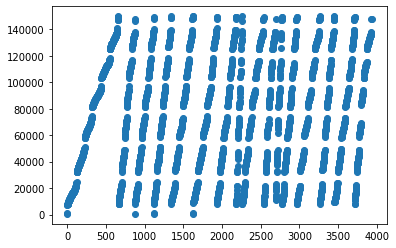

In [8]:
spkTimes = np.asarray([spk[0] for spk in spks])
spkLocs = np.asarray([spk[1] for spk in spks])
plt.scatter(np.arange(spkTimes.shape[0]), spkTimes)a

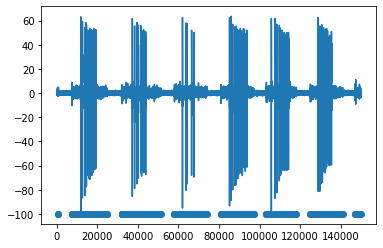

In [9]:
from matplotlib.pyplot import figure
plt.plot(data[:,0])
plt.scatter(spkTimes[0:800], np.ones(800)*-100)

In [119]:
# Saving timing data 
np.savetxt("times_from_spkdetect_better_cross_detect.csv", np.asarray(times), delimiter=',')

In [115]:
bruh = np.vstack((spkTimes, spkLocs))
bruh = np.asarray([np.asarray(x) for x in bruh[1]])
bruh = np.vstack((spkTimes, bruh))

/home/samir/repos/floodfill/rewrite/env/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


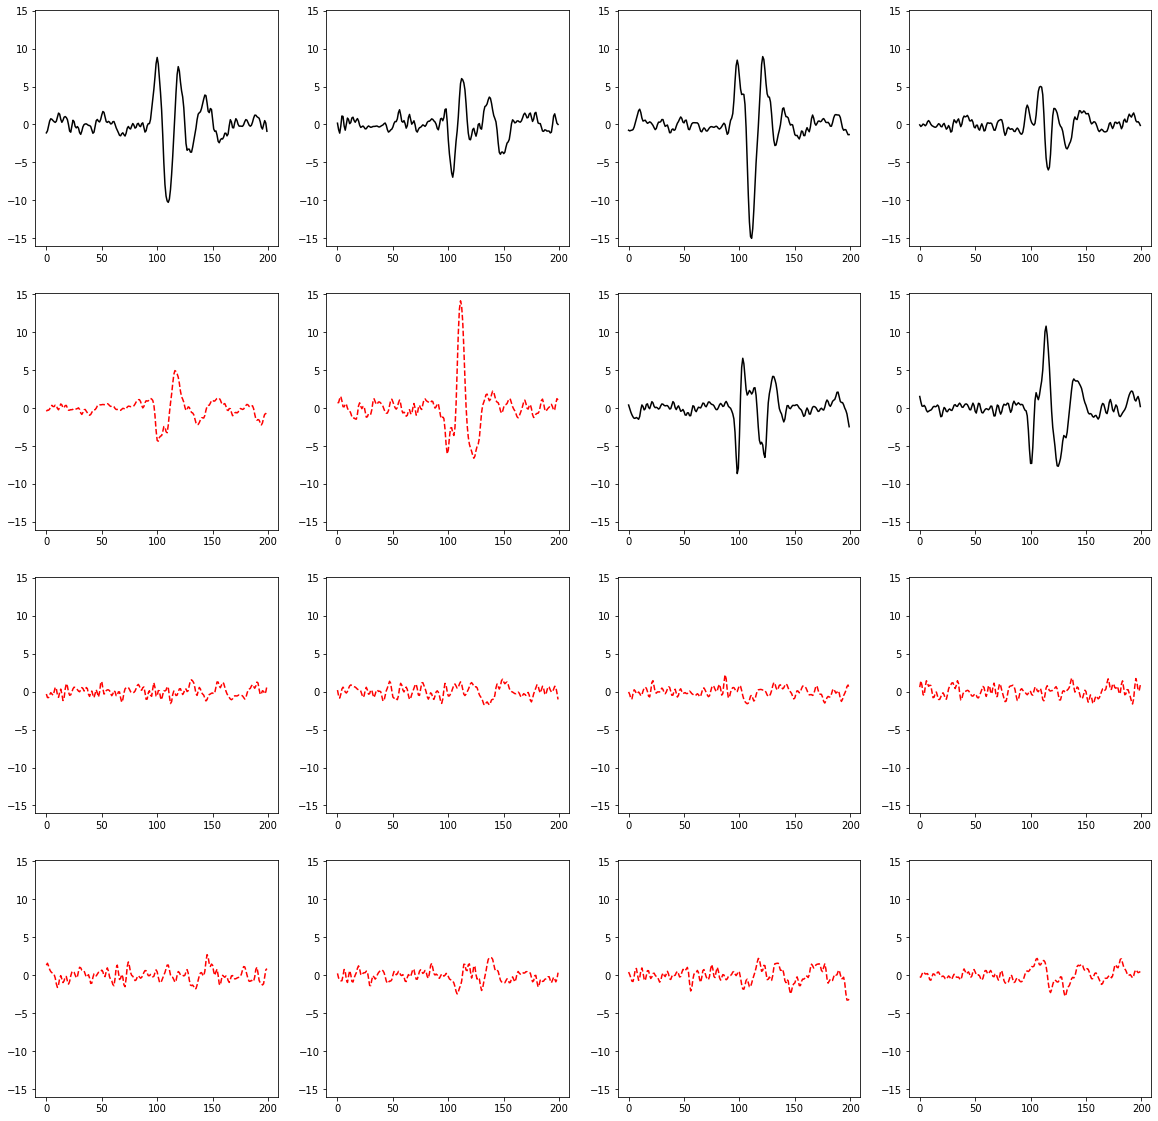

In [162]:
# Create a 4 x 4 map, Each grid cell 10 ms window around that spike
# Plot all 16 channels, channels that have a spike are black, channels that don't are (blue) 

def spkData(data, spk):
    spkTime, spkLocs = spk 
    chanFound = spkLocs[0][1]
    spkTime = int(spkTime)
    spkChans = set([x[1] for x in spkLocs])
    fig, axs = plt.subplots(4,4)
    fig.set_figheight(20)
    fig.set_figwidth(20)
    count, minY, maxY = 0, float('inf'), -float('inf') 

    for i in range(4):
        for j in range(4):
            if count in spkChans:
                axs[i][j].plot(data[count][spkTime-100:spkTime+100],'k')
            else: 
                axs[i][j].plot(data[count][spkTime-100:spkTime+100],'r--')
            minY = min(min(data[count][spkTime-100:spkTime+100]),minY)
            maxY = max(max(data[count][spkTime-100:spkTime+100]),maxY)
            count+=1
     
    for i in range(4):
        for j in range(4):
            axs[i][j].set_ylim((minY-1, maxY+1))
    plt.savefig('random spike') 
spkData(data.transpose(), (bruh[0][2],bruh[1][2]))

(448.3534044495695,
 [(447, 0),
  (448, 0),
  (449, 0),
  (450, 0),
  (451, 0),
  (452, 0),
  (446, 0),
  (445, 0)])